<h1 style="text-align:center;">Probability theory</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p></p>

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [82]:
# counts of different events
c = np.array([1,2,4,3])
probabilities = 100 * c / np.sum(c)
probabilities

array([10., 20., 40., 30.])

In [83]:
# Drawing marbles from a jar
blue = 40
yellow = 30
orange = 20
total = blue + yellow + orange

jar = np.hstack((1*np.ones(blue),2*np.ones(yellow),3*np.ones(orange))) # hstack = horizontal stacking
# 1 represents a blue, 2 a yellow, 3 an orange

numberOfDraws = 5000
draws = np.zeros(numberOfDraws)
for draw in range(numberOfDraws):
    randomMarble = int(np.random.rand() * len(jar))
    draws[draw] = jar[randomMarble]

proportionOfBlue   = sum(draws==1) / numberOfDraws
proportionOfYellow = sum(draws==2) / numberOfDraws
proportionOfOrange = sum(draws==3) / numberOfDraws
print(f'Proportion of blue  ={np.round(proportionOfBlue,3)}, theoretical probability={np.round(blue/total,3)}')
print(f'Proportion of yellow={np.round(proportionOfYellow,3)}, theoretical probability={np.round(yellow/total,3)}')
print(f'Proportion of orange={np.round(proportionOfOrange,3)}, theoretical probability={np.round(orange/total,3)}')

Proportion of blue  =0.442, theoretical probability=0.444
Proportion of yellow=0.342, theoretical probability=0.333
Proportion of orange=0.216, theoretical probability=0.222


<h1 style="text-align:center;">Odds</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>An odd is the probability of an event not occurring vs occurring</p>
<p>r = (1-p)/p</p>

<h1 style="text-align:center;">Probability functions</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>Probability: The chance of a specific event happening.</p>
<p>Probability mass: A function describing the probability of a set of exclusive, discrete events. </p>
<p>Probability density: A function describing the probability of a set of exclusive, continuous events. </p>
<p>Cumulative distribution function (cdf): The integral of the probability distribution function (pdf)</p>

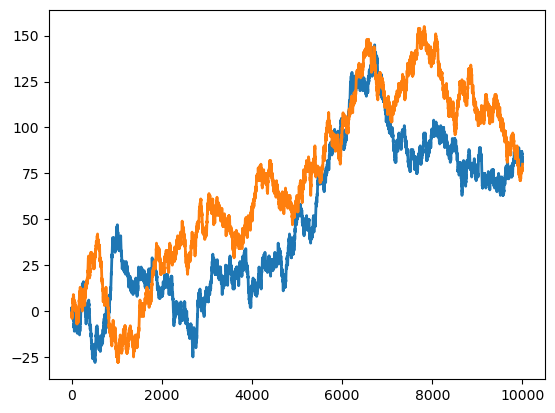

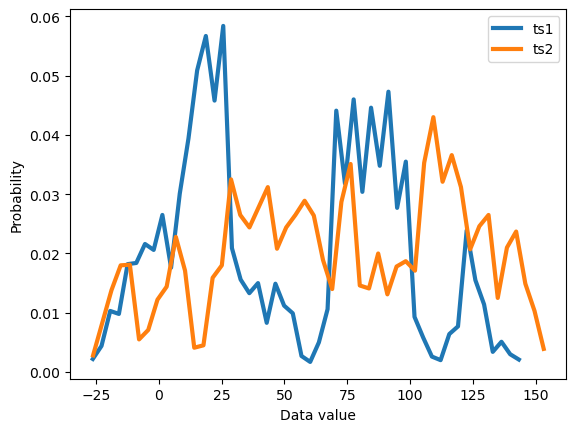

In [84]:
N = 10_004
data1 = np.cumsum( np.sign(np.random.randn(N)) )
data2 = np.cumsum( np.sign(np.random.randn(N)) )

plt.plot(np.arange(N),data1,linewidth=2)
plt.plot(np.arange(N),data2,linewidth=2)
plt.show()

bins = 50
y,x = np.histogram(data1,bins)
x1 = (x[1:] + x[:-1]) / 2
y1 = y/sum(y)
y,x = np.histogram(data2,bins)
x2 = (x[1:] + x[:-1]) / 2
y2 = y/sum(y)

plt.plot(x1,y1,x2,y2,linewidth=3)
plt.legend(('ts1','ts2'))
plt.xlabel('Data value')
plt.ylabel('Probability')
plt.show()

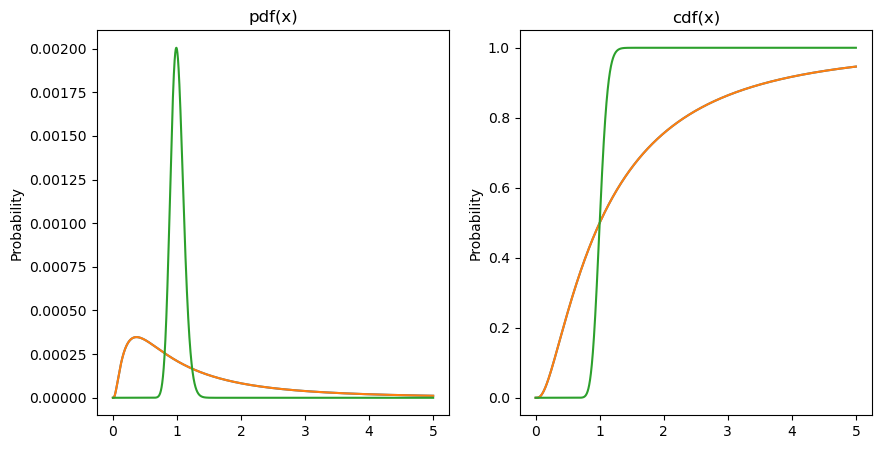

In [85]:
#cdf
x = np.linspace(0,5,10_001)
p1 = stats.lognorm.pdf(x,1)
c1 = stats.lognorm.cdf(x,1)

p2 = stats.lognorm.pdf(x,.1)
c2 = stats.lognorm.cdf(x,.1)

fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(x,p1/sum(p1))
ax[0].plot(x,p1/sum(p1), x,p2/sum(p2))
ax[0].set_ylabel('Probability')
ax[0].set_title('pdf(x)')

ax[1].plot(x,c1)
ax[1].plot(x,c1, x,c2)
ax[1].set_ylabel('Probability')
ax[1].set_title('cdf(x)')

plt.show()

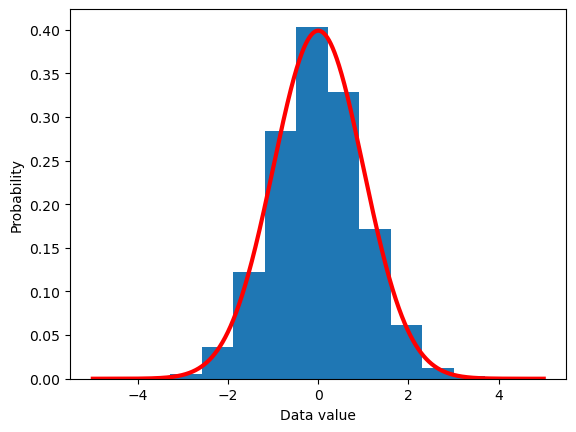

In [86]:
# Theoretical normal distribution
x = np.linspace(-5,5,10101)
theoNormDist = stats.norm.pdf(x)

# empirical distribution
samples = 4000
sampledata = np.zeros(samples)

for i in range(samples):
    sampledata[i] = np.random.randn()

plt.hist(sampledata,density=True)
plt.plot(x,theoNormDist,'r',linewidth=3)
plt.xlabel('Data value')
plt.ylabel('Probability')
plt.show()

In [87]:
# population
N = 1_000_000
population = np.random.randn(N)
population = population - np.mean(population) # population mean is 0

samplesize = 30
sampleindexes = np.random.randint(0,N,samplesize)
samplemean = np.mean( population[sampleindexes] )
print(samplemean)

-0.21526805174047117


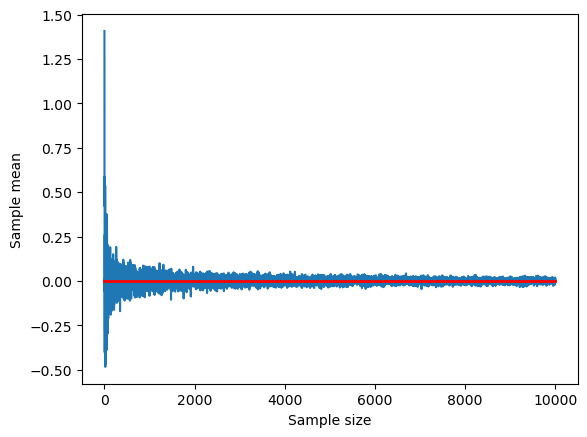

In [88]:
samplesizes = np.arange(1,10_000)
means = np.zeros(len(samplesizes))

for i in samplesizes:
    samplesize = i
    sampleindexes = np.random.randint(0,N,samplesize)
    samplemean = np.mean( population[sampleindexes] )
    means[i-1] = samplemean

plt.plot(samplesizes,means)
plt.plot([1,10_000],[0,0],'r',linewidth=2)
plt.xlabel('Sample size')
plt.ylabel('Sample mean')
plt.show()


In [89]:
np.mean(means) # mean of the means

0.00039263607786760497

<h1 style="text-align:center;">Expected value</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>Equals average if everything is equally liekly, and if there are enough and representative data points.</p>

<h1 style="text-align:center;">Conditional probability</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<ul>
    <li>What is the probability of the patient having diabetes?</li>
    <li>What is the probability of the patient having diabetes, if both their parents have it?</li>
</ul>
<p>The probability of event A changes based of what you know about event B.</p>

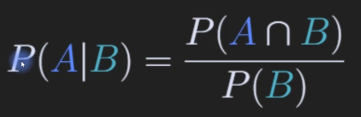

<p>"Probability of (A given B) equals probability of (A and B) divided by the probability of (B)"</p>

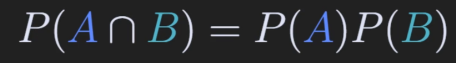


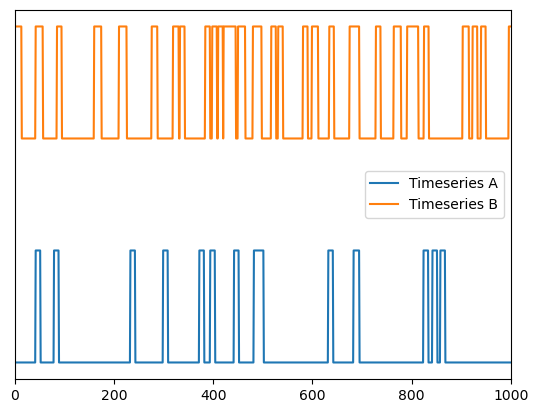

In [90]:
N = 10_000
spikeDur = 10
spikeNumA = .01
spikeNumB = .05

timeseriesA = np.zeros(N)
timeseriesB = np.zeros(N)

spiketimesA = np.random.randint(1,N,int(N*spikeNumA))
spiketimesB = np.random.randint(1,N,int(N*spikeNumB))

for i in range(len(spiketimesA)):
    bnd_pre = int( max(0,spiketimesA[i]-spikeDur/2) )
    bnd_pst = int( min(N,spiketimesA[i]+spikeDur/2) )
    timeseriesA[bnd_pre:bnd_pst] = 1

for i in range(len(spiketimesB)):
    bnd_pre = int( max(0,spiketimesB[i]-spikeDur/2) )
    bnd_pst = int( min(N,spiketimesB[i]+spikeDur/2) )
    timeseriesB[bnd_pre:bnd_pst] = 1

# Most values are 0, but some values are 1 in both timeseries
plt.plot(timeseriesA)
plt.plot(timeseriesB+2)
plt.legend(['Timeseries A', 'Timeseries B'])
plt.xlim((0,1000))
plt.xticks()
plt.yticks([])
plt.show()

In [91]:
probA = np.mean(timeseriesA) # P(A)
probB = np.mean(timeseriesB) # P(B)
probAB = np.mean(timeseriesA + timeseriesB == 2) # P(A and B)
probA_B = probAB / probB # P(A|B)
probB_A = probAB / probA # P(B|A)

print(f'P(A)       = {probA}')
print(f'P(B)       = {probB}')
print(f'P(A and B) = {probAB}')
print('')
print(f'P(A|B)     = {probA_B} (Probability of A, if B)')
print(f'P(B|A)     = {probB_A} (Probability of B, if A)')

P(A)       = 0.0936
P(B)       = 0.392
P(A and B) = 0.0468

P(A|B)     = 0.11938775510204082 (Probability of A, if B)
P(B|A)     = 0.5 (Probability of B, if A)


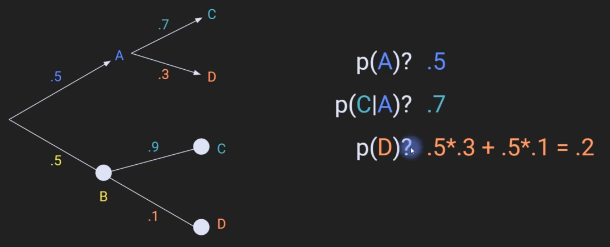

<h1 style="text-align:center;">Law of large numbers</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>As the number of repetitions increase, the mean of sample means will better approximate the population mean.</p>

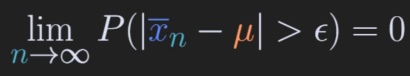

expected value is 3.0
Number of rolls is 8388608
Sample after sampling 8 elements ONCE is 3.875


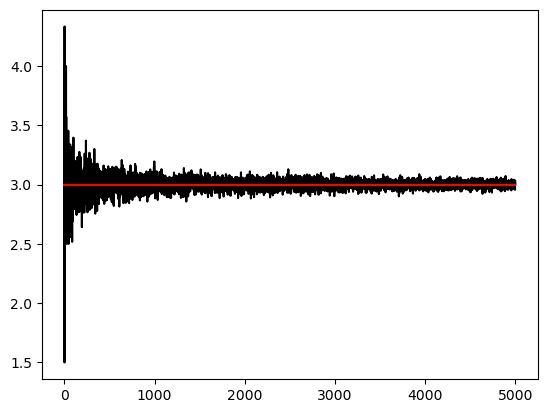

In [92]:
# weighed (not fair) dice
p1 = 2/8
p2 = 2/8
p3 = 1/8
p4 = 1/8
p5 = 1/8
p6 = 1/8
p = np.array([p1, p2, p3, p4, p5, p6])
expectedValue = sum([(i + 1) * p[i] for i in range(len(p))])
print(f'expected value is {expectedValue}')

population = [1,1,2,2,3,4,5,6]
for i in range(20):
    population = np.hstack((population,population)) # horizontal stack

print(f'Number of rolls is {len(population)}')

sampleSize = 8
sample = np.random.choice(population,sampleSize)
sampleMean = np.mean(sample)
print(f'Sample after sampling {sampleSize} elements ONCE is {sampleMean}')

k = 5_000
sampleAverages = np.zeros(k)

for i in range(k):
    idx = np.floor(np.random.rand(i+1) * len(population)) # the size of the sample is always i + 1
    sampleAverages[i] = np.mean( population[idx.astype(int)] )

plt.plot(sampleAverages,'k')
plt.plot([0,k],[expectedValue,expectedValue],'r')
plt.show()

In [93]:
print(f'mean of means is {np.mean(sampleAverages)}. The law of large numbers is that this will converge to the expected value.')

mean of means is 3.0004939741948022. The law of large numbers is that this will converge to the expected value.


<h1 style="text-align:center;">Central limit theorem</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>"All roads lead to Gauss."</p>
<p>The distribution of sample means always approaches a Gaussian distribution.</p>

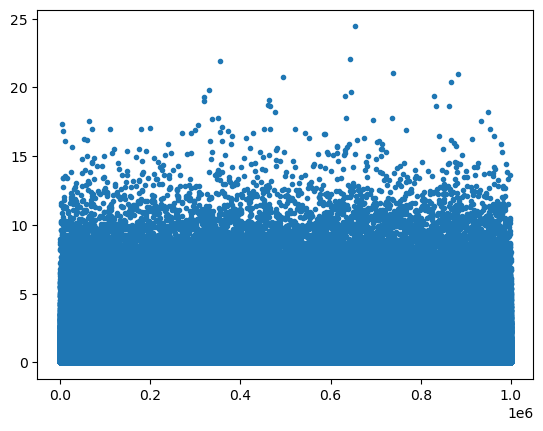

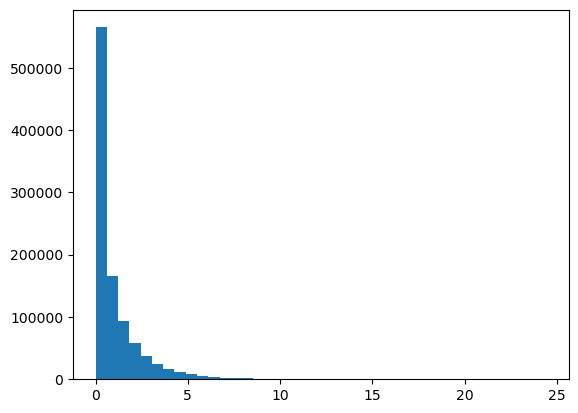

In [94]:
N = 1_000_000
data = np.random.randn(N)**2

plt.plot(data,'.')
plt.show()
plt.hist(data,40)
plt.show()

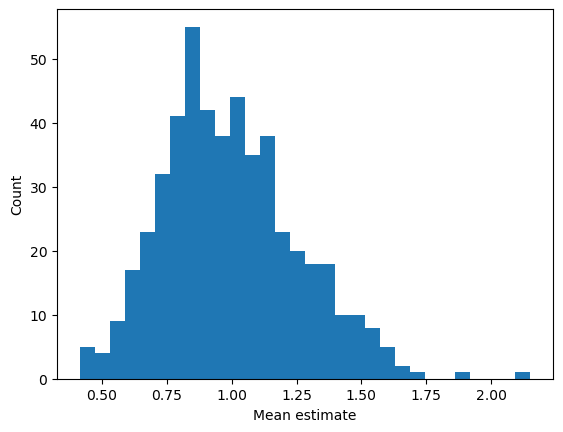

In [96]:
sampleSize   = 30
numberOfExps = 500

sampleMeans = np.zeros(numberOfExps)

for i in range(numberOfExps):
    sampleindex = np.random.randint(0,N,sampleSize)
    sampleMeans[i] = np.mean( data[sampleindex] )

plt.hist(sampleMeans,30)
plt.xlabel('Mean estimate')
plt.ylabel('Count')
plt.show()